In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("results/results.csv", low_memory=False)
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,RequestDuration_ns,Status,StatusCode,Error
0,apisix,2024-03-04 09:58:14+00:00,23138333,1499583,108708,673708,97375,200 OK,200,NaN
1,apisix,2024-03-04 09:58:14+00:00,199780083,1287000,128708,658834,85334,200 OK,200,NaN
2,apisix,2024-03-04 09:58:14+00:00,214713667,1412458,132750,634083,75084,200 OK,200,NaN
3,apisix,2024-03-04 09:58:14+00:00,239088667,1823625,306250,690917,35000,200 OK,200,NaN
4,apisix-decoupled,2024-03-04 09:58:14+00:00,225354625,752208,118833,608375,33708,200 OK,200,NaN


In [28]:
df = df[df['Error'].isna()].copy()

In [29]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000
df['netto_ms'] = df['Duration_ms'] - df['ConnDuration_ms']

In [30]:
aggs = {
    col: ['count','mean','std'] for col in df.columns if col.endswith('_ms')
}
df.groupby(['ID','StatusCode']).agg(aggs)

Duration_ms                          \
                                  count        mean         std   
ID               StatusCode                                       
apisix           200                242  132.891702  773.451238   
apisix-decoupled 200                240   82.525073  396.143304   
kong             200                238  104.980535  772.885317   
upstream         200                239  120.235150  647.452974   

                            ConnDuration_ms                         \
                                      count       mean         std   
ID               StatusCode                                          
apisix           200                    242  48.937900  434.755845   
apisix-decoupled 200                    240  35.108597  225.131104   
kong             200                    238  17.893823  100.354745   
upstream         200                    239  60.518527  362.064306   

                            DialDuration_ms                       \
                                      count      mean        std   
ID               StatusCode                                        
apisix           200                    242  3.761613  28.139757   
apisix-decoupled 200                    240  3.290845  21.262996   
kong             200                    238  1.946165  11.852164   
upstream         200                    239  3.621715  20.023983   

                            DNSDuration_ms                         \
                                     count       mean         std   
ID               StatusCode                                         
apisix           200                   242  28.416679  224.910642   
apisix-decoupled 200                   240  23.677107  161.051394   
kong             200                   238  11.010842   63.201509   
upstream         200                   239  32.090627  200.851490   

                            RequestDuration_ms                       netto_ms  \
                                         count       mean        std    count   
ID               StatusCode                                                     
apisix           200                       242   8.877817  61.980354      242   
apisix-decoupled 200                       240   4.785871  32.234120      240   
kong             200                       238   3.091955  20.271037      238   
upstream         200                       239  10.207163  55.837373      239   

                                                    
                                  mean         std  
ID               StatusCode                         
apisix           200         83.953802  437.855374  
apisix-decoupled 200         47.416477  195.544097  
kong             200         87.086713  678.709149  
upstream         200         59.716624  356.306912

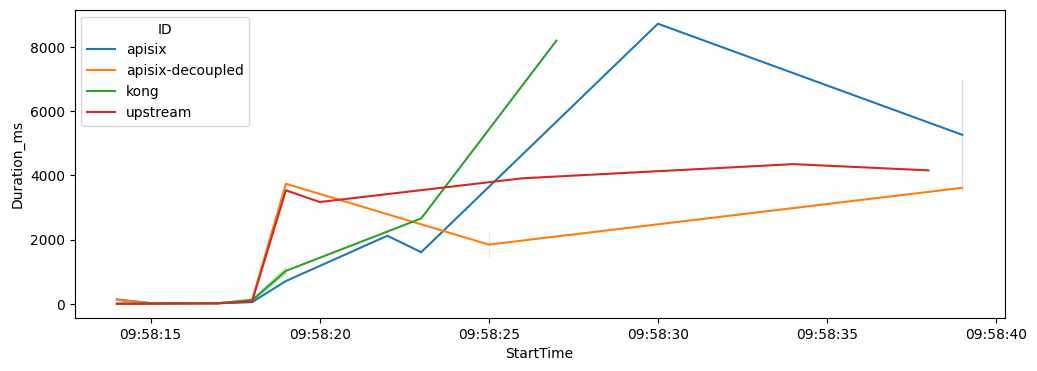

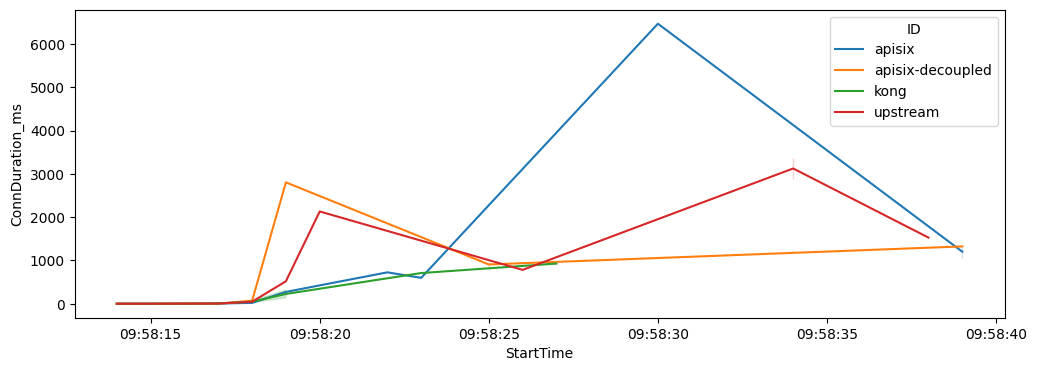

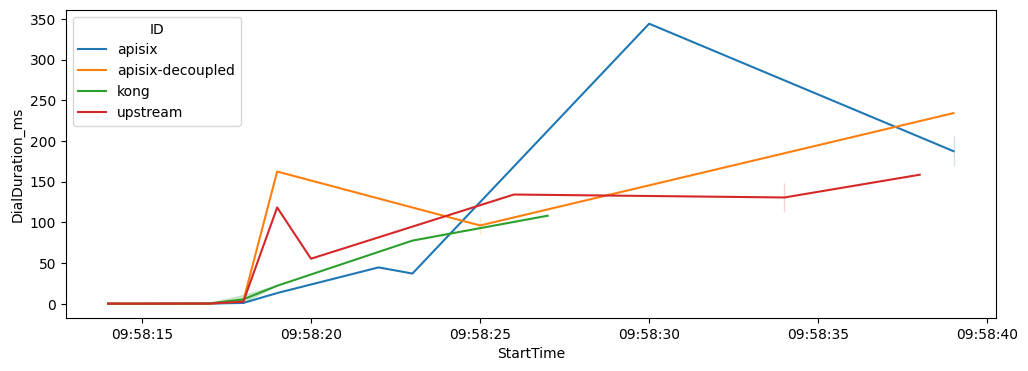

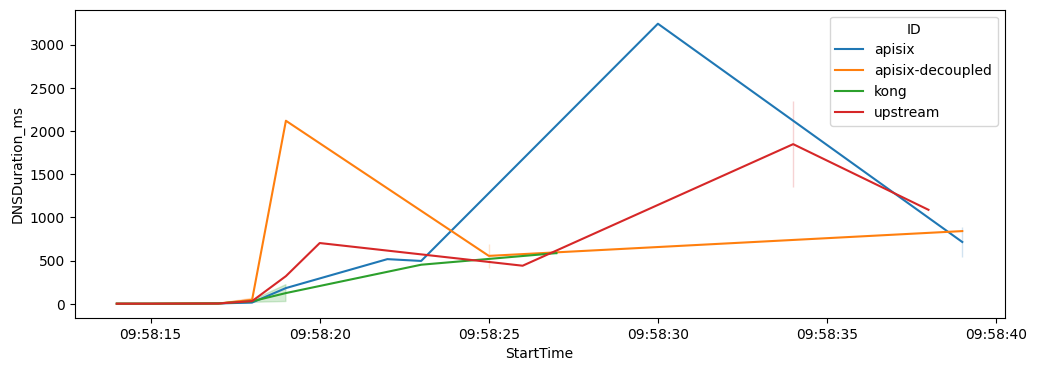

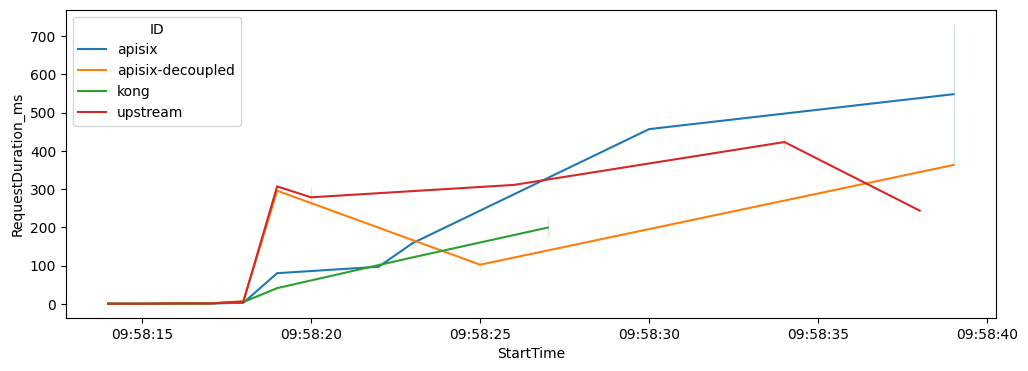

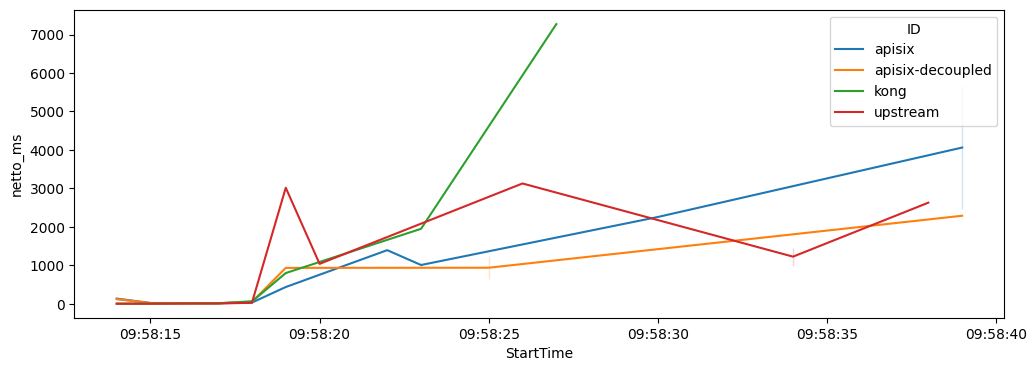

In [31]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

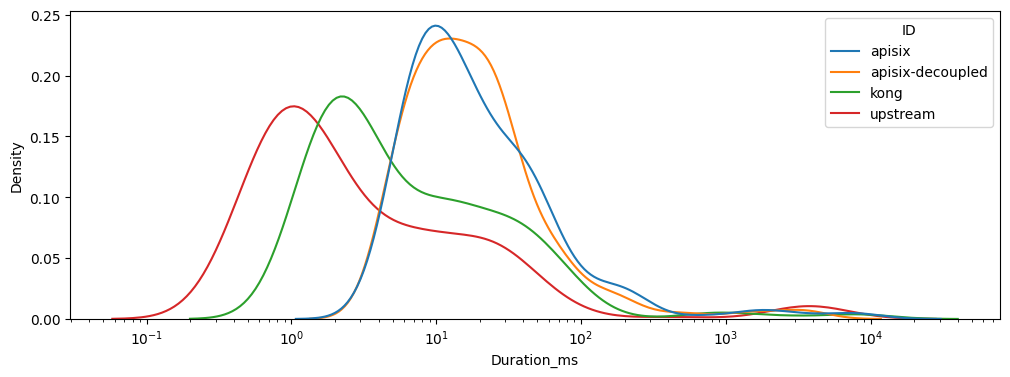

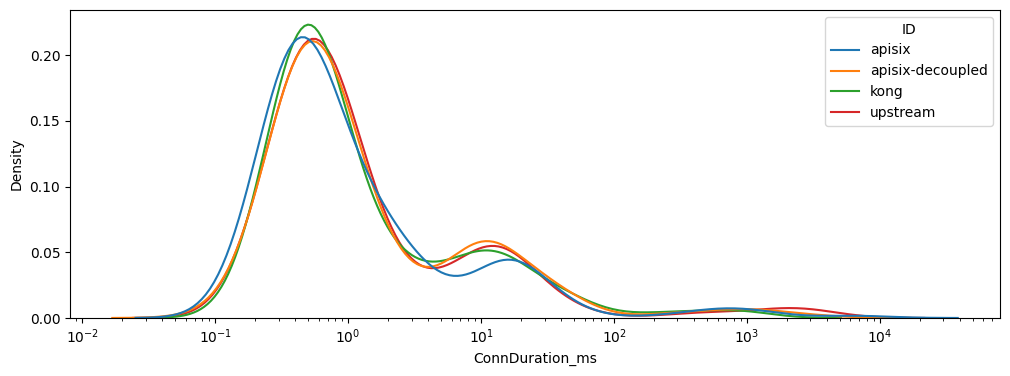

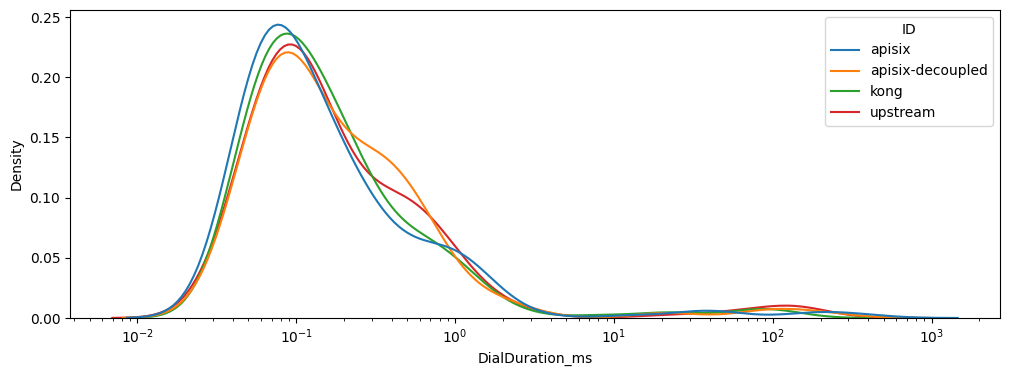

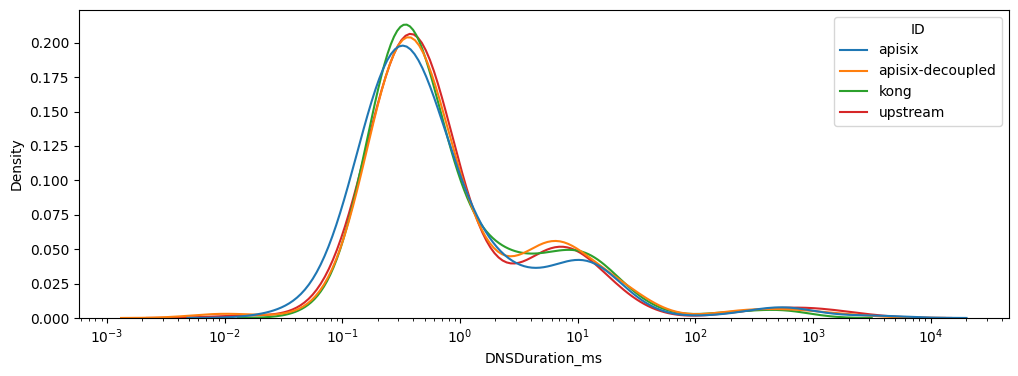

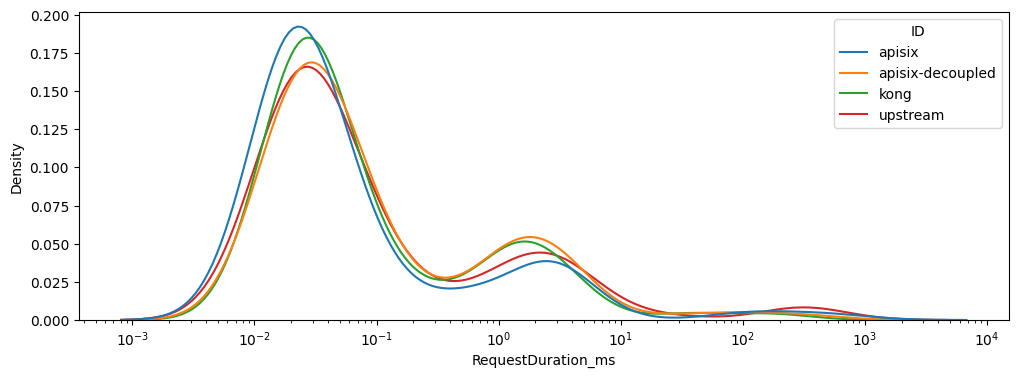

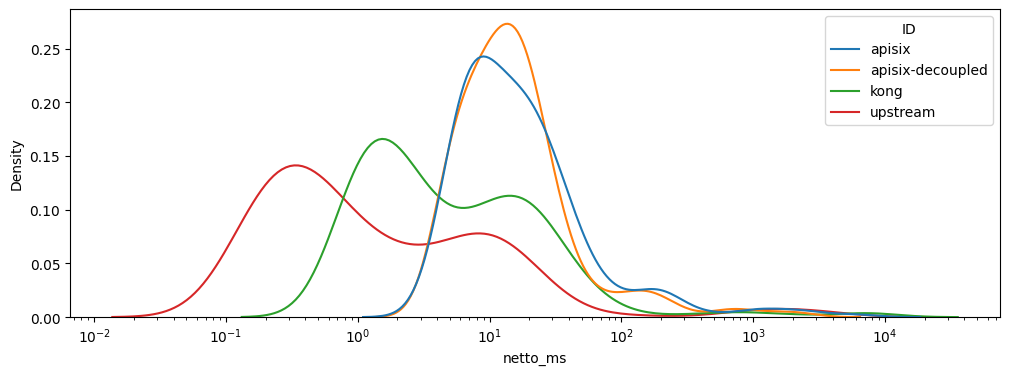

In [34]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID", log_scale=(True,False))
        plt.show()